In [74]:
import numpy as np
import pandas as pd


In [75]:
data = pd.read_csv("titanic.csv")

In [76]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [77]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [78]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]
data_clean = data.drop(columns_to_drop,axis=1)

In [79]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [81]:
print(data_clean.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500


In [82]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [83]:
data_clean = data_clean.fillna(data_clean["Age"].mean())


In [84]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB
None


In [85]:
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [86]:
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

x = data_clean[input_cols]
y = data_clean[output_cols]

print(x.shape,y.shape)

(891, 6) (891, 1)


In [121]:
#define entrpy and info gain

def entropy(col):
    ent=0.0
    counts = np.unique(col,return_counts =True)
    N = float(col.shape[0])
    #print(counts)
    
    for ix in counts[1]:
        p = ix/N
        ent += (-1*p*np.log2(p))
    return ent
    

In [122]:
arr = np.array([1,1,1,0,0,0])
entropy(arr)


1.0

In [123]:
def divide_data(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns = x_data.columns)
    x_left = pd.DataFrame([],columns = x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right =  x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right
    
        
        

In [124]:
#left,right = divide_data(data_clean[:10],'Sex',0.5)
#print(left)
#print(right)

In [125]:
def information_gain(x_data,fkey,fval):
    left,right = divide_data(x_data,fkey,fval)
   # % of examples on left and right 
    l = float(left.shape[0])/x.shape[0]
    r = float(right.shape[0])/x.shape[0]

# all examples at one side.. No further breaking of tree 
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000  
#min. information gain

    info_gain = entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return info_gain
    
    

In [126]:
#test our function
for fx in x.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))


Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [136]:
#building classifier
class DecisionTree:
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right =None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth =depth
        self.target = None
        
    def train(self,X_train):
        features =['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        
        for ix in feature:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean() 
        print("Making tree feature is ",self.fkey)
        
        # Split the data 
        
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        #Truely a left node
        
        if data_left.shape == 0 or data_right.shape == 0:
            if X_train.Survived.mean() >=0.5:
                self.target ="Survive"
            else:
                self.target ="Dead"
            return 
        
        #stop early when depth>=maxdepth
        
        if (self.depth>=self.max_depth):
            if X_train.Survived.mean() >=0.5:
                self.target ="Survive"
            else:
                self.target ="Dead"
            return 
        
        #recursive case
        
        self.left = DecisionTree(depth=self.depth+1,max_depth=5)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=5)
        self.right.train(data_right)
        
        #you can set the target at every node
        if X_train.Survived.mean() >= 0.5:
                self.target ="Survive"
        
        else:
                self.target ="Dead"
        return 
    
    
    def Predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.Predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.Predict(test)
        

        
        
        
        
            
            
        
    

###Train-test set split

In [167]:
split =int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)


In [168]:
print(test_data.shape,train_data.shape)

(268, 7) (623, 7)


In [169]:
dt = DecisionTree()
dt.train(train_data)

Making tree feature is  Sex
Making tree feature is  Pclass
Making tree feature is  Age
Making tree feature is  SibSp
Making tree feature is  Pclass
Making tree feature is  Age
Making tree feature is  Age
Making tree feature is  SibSp
Making tree feature is  Parch
Making tree feature is  Pclass
Making tree feature is  SibSp
Making tree feature is  Fare
Making tree feature is  Parch
Making tree feature is  Age
Making tree feature is  Pclass
Making tree feature is  Age
Making tree feature is  Age
Making tree feature is  Parch
Making tree feature is  SibSp
Making tree feature is  Fare
Making tree feature is  Age
Making tree feature is  Age
Making tree feature is  Fare
Making tree feature is  Age
Making tree feature is  Age
Making tree feature is  Fare
Making tree feature is  Age
Making tree feature is  Parch
Making tree feature is  Fare
Making tree feature is  Fare
Making tree feature is  Fare
Making tree feature is  Age
Making tree feature is  Fare
Making tree feature is  Parch
Making tre

In [170]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [171]:
y_pred =[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.Predict(test_data.loc[ix]))


In [172]:
y_pred 

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [173]:
y_actual = test_data[output_cols]
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8           0
9           1
10          0
11          0
12          1
13          0
14          0
15          0
16          0
17          0
18          1
19          0
20          1
21          1
22          1
23          0
24          1
25          0
26          1
27          0
28          1
29          0
..        ...
238         0
239         1
240         0
241         0
242         1
243         1
244         0
245         0
246         1
247         0
248         1
249         0
250         0
251         1
252         1
253         0
254         0
255         0
256         1
257         1
258         0
259         0
260         0
261         0
262         0
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [174]:
le = LabelEncoder()
y_pred =le.fit_transform(y_pred)

In [175]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [176]:
print(y_pred.shape)

(268,)


In [177]:
print(y_actual.shape)

(268, 1)


In [178]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [179]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]
print(acc)

Survived    0.817164
dtype: float64


#Decision tree using sklearn

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [189]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [193]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

## visualising a decision tree

In [197]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [201]:
dot_data = StringIO()

In [202]:
export_graphviz(sk_tree,out_file = dot_data,filled=True,rounded=True)

In [212]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

## random Forest

In [213]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test  = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [214]:
sk_tree = DecisionTreeClassifier(criterion='entropy')

In [217]:
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [218]:
sk_tree.score(X_test,Y_test)

0.7761194029850746

In [219]:
from sklearn.ensemble import RandomForestClassifier 

In [225]:
rf =  RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [226]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
rf.score(X_train,Y_train)

0.85553772070626

In [228]:
rf.score(X_test,Y_test)

0.8470149253731343

In [249]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5),X_train,Y_train).mean()

c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [250]:
print(acc)

0.7945466369379414


In [251]:
acc_list = []
for i in range(1,50):
    acc =cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5),X_train,Y_train).mean()
    acc_list.append(acc)

c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value o

c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ekta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value o

In [252]:
print(acc_list)

[0.8057413600891862, 0.7865570419918245, 0.8009259259259259, 0.8121438746438746, 0.7913182831661092, 0.7929208472686734, 0.7865260745695529, 0.7849080267558528, 0.7833209463644245, 0.7768797225318963, 0.786502849002849, 0.7929131054131053, 0.7929285891242412, 0.7897002353524093, 0.8041310541310541, 0.7784590610677569, 0.7880821875387092, 0.7800848507370247, 0.7913182831661092, 0.7912950575994054, 0.7993233618233618, 0.788136380527685, 0.784900284900285, 0.7928976217019694, 0.8073594079028862, 0.8089310045831785, 0.7977440232875015, 0.797689830298526, 0.786502849002849, 0.7704384986993683, 0.8137541806020067, 0.7944924439489657, 0.7865183327139849, 0.7848925430447169, 0.7977362814319336, 0.7993233618233618, 0.800918184070358, 0.7784977703455964, 0.7929363309798093, 0.7961182336182336, 0.7816796729840209, 0.7816796729840209, 0.7993465873900657, 0.7897002353524093, 0.7752694165737645, 0.7784745447788927, 0.7945311532268055, 0.7849080267558528, 0.7945156695156695]


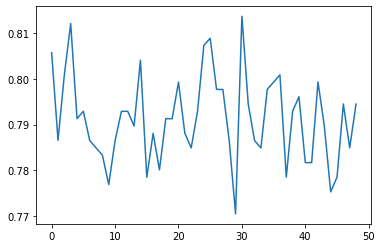

In [253]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.show()

In [254]:
np.argmax(acc_list)

30